In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(data.iloc[:,6:15].to_numpy())

In [5]:
prep_data

array([[ 0.3578544 ,  0.17811746, -0.20134176, ...,  2.02378989,
         0.38816156,  0.82468719],
       [ 0.18006054,  0.06357565,  0.31177162, ..., -0.12168444,
         0.6335824 , -0.21910821],
       [ 0.33341227,  0.25366632, -0.12184532, ..., -0.14936798,
         0.76101245, -0.31272215],
       ...,
       [ 0.35767335,  0.2853481 ,  0.60807653, ..., -0.3708363 ,
        -0.1144792 ,  1.99018071],
       [-0.52151911, -0.30685745, -0.38201548, ..., -0.16320975,
        -0.35754022, -0.45314305],
       [-0.19218405, -0.1094556 , -0.35310769, ..., -0.14936798,
         0.00351159, -0.39229399]])

# Training the model

In [6]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)


NearestNeighbors(algorithm='brute', metric='cosine')

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [8]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [9]:
pipeline.transform(data.iloc[0:1,6:15].to_numpy())[0]

array([    0, 21398, 18792, 21437, 20611, 17712, 14485, 20267,  4706,
        6491], dtype=int64)

# Machine Learning Model Training

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [35]:
features = data[['FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
labels = data['Calories']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=10, random_state=42)

# Decision Tree

In [36]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Mean Squared Error: 2000.4250000000004
Root Mean Squared Error: 44.72611094204369
Mean Absolute Error: 22.47000000000001
R-squared (R²): 0.9399587383261514


# RandomForest

In [42]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Mean Squared Error: 1545.416981499999
Root Mean Squared Error: 39.31179188869415
Mean Absolute Error: 19.00049999999997
R-squared (R²): 0.9536154640231698


# K-Nearest-Neighbors

In [39]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

Mean Squared Error: 7257.890959999997
Root Mean Squared Error: 85.19325654064409
Mean Absolute Error: 53.251999999999974
R-squared (R²): 0.7821598258721923


# PipeLine

In [40]:
pipeline = Pipeline([
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Mean Squared Error: 1570.295509219376
Root Mean Squared Error: 39.62695432681366
Mean Absolute Error: 15.932144816065176
R-squared (R²): 0.9528687536027045


# StandardScaler

In [41]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Mean Squared Error: 1570.2955092193872
Root Mean Squared Error: 39.6269543268138
Mean Absolute Error: 15.932144816064902
R-squared (R²): 0.9528687536027042


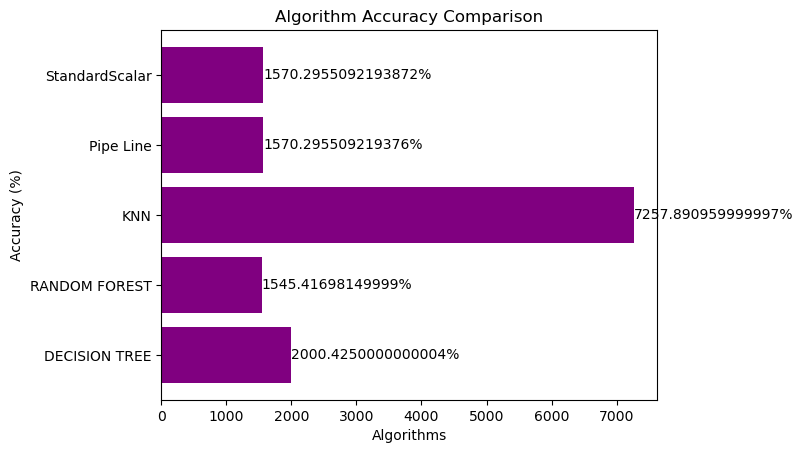

In [43]:
import matplotlib.pyplot as plt

algorithms = ['DECISION TREE','RANDOM FOREST','KNN','Pipe Line', 'StandardScalar']

accuracy = [2000.4250000000004,1545.41698149999,7257.890959999997,1570.295509219376,1570.2955092193872]

plt.barh(algorithms, accuracy, color='purple')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Algorithm  Comparison')
for i in range(len(algorithms)):
    plt.text(accuracy[i] + 1, i, f'{accuracy[i]}%', ha='left', va='center')

plt.show()

# Deep Learning Model Training

# Long Short Term Memory

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assuming 'features' and 'labels' are your feature and target variables
features = data[['FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
labels = data['Calories']

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, labels, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (assuming a time series structure)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Epoch 1/15
701/701 [==============================] - 14s 12ms/step - loss: 433479.3750 - val_loss: 265503.3750
Epoch 2/15
701/701 [==============================] - 9s 12ms/step - loss: 412454.7500 - val_loss: 247774.0469
Epoch 3/15
701/701 [==============================] - 8s 12ms/step - loss: 396205.7188 - val_loss: 233140.5156
Epoch 4/15
701/701 [==============================] - 8s 12ms/step - loss: 382639.2188 - val_loss: 220941.9531
Epoch 5/15
701/701 [==============================] - 7s 10ms/step - loss: 371323.9062 - val_loss: 210813.3906
Epoch 6/15
701/701 [==============================] - 8s 12ms/step - loss: 362018.2188 - val_loss: 202574.9219
Epoch 7/15
701/701 [==============================] - 8s 11ms/step - loss: 354604.6250 - val_loss: 196224.5000
Epoch 8/15
701/701 [==============================] - 9s 13ms/step - loss: 348867.1875 - val_loss: 191281.0781
Epoch 9/15
701/701 [==============================] - 7s 11ms/step - loss: 341699.6562 - val_loss: 179575.4375


# Recurrent Neural Network

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

# Assuming 'features' and 'labels' are your feature and target variables
features = data[['FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
labels = data['Calories']

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, labels, test_size=0.2, random_state=42)

# Reshape the data for RNN input (assuming a time series structure)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create an RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Epoch 1/15
701/701 [==============================] - 9s 9ms/step - loss: 435333.3438 - val_loss: 268019.5312
Epoch 2/15
701/701 [==============================] - 5s 7ms/step - loss: 414981.3438 - val_loss: 250093.5625
Epoch 3/15
701/701 [==============================] - 5s 7ms/step - loss: 398383.1562 - val_loss: 235118.2344
Epoch 4/15
701/701 [==============================] - 5s 8ms/step - loss: 384534.5000 - val_loss: 222542.8906
Epoch 5/15
701/701 [==============================] - 5s 7ms/step - loss: 372901.6250 - val_loss: 212136.2031
Epoch 6/15
701/701 [==============================] - 5s 7ms/step - loss: 363293.3438 - val_loss: 203673.5000
Epoch 7/15
701/701 [==============================] - 5s 7ms/step - loss: 355599.3750 - val_loss: 197060.4844
Epoch 8/15
701/701 [==============================] - 5s 7ms/step - loss: 349616.3750 - val_loss: 191940.9688
Epoch 9/15
701/701 [==============================] - 5s 7ms/step - loss: 345090.5625 - val_loss: 188162.9531
Epoch 10/1